In [5]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from get_weather_data import getWeatherData

In [2]:
from get_aq_data import get_flo_data, ID_to_name

In [3]:
data, hourly_mean, daily_mean = get_flo_data()

In [4]:
all_site_daily_mean = daily_mean.mean(axis=1)

In [12]:
weather = getWeatherData('ISOUTHAM4', 1, 1, 2019, 'year')

http://www.wunderground.com/weatherstation/WXDailyHistory.asp?ID=ISOUTHAM4&day=1&month=1&year=2019&graphspan=year&format=1


In [15]:
weather.index = pd.DatetimeIndex(weather.Date)

In [17]:
merged = pd.merge(all_site_daily_mean.rename('PM25'), weather, left_index=True, right_index=True)

In [19]:
merged.columns

Index(['PM25', 'Date', 'TemperatureHighC', 'TemperatureAvgC',
       'TemperatureLowC', 'DewpointHighC', 'DewpointAvgC', 'DewpointLowC',
       'HumidityHigh', 'HumidityAvg', 'HumidityLow', 'PressureMaxhPa',
       'PressureMinhPa', 'WindSpeedMaxKMH', 'WindSpeedAvgKMH',
       'GustSpeedMaxKMH', 'PrecipitationSumCM', 'station'],
      dtype='object')

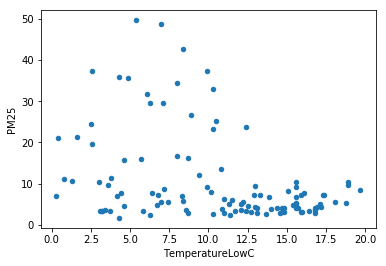

In [29]:
merged.plot(x='TemperatureLowC', y='PM25', kind='scatter')

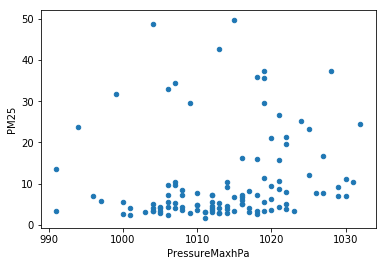

In [25]:
merged.plot(x='PressureMaxhPa', y='PM25', kind='scatter')

In [28]:
merged.corr()['PM25'].abs().sort_values()

HumidityHigh          0.083172
TemperatureHighC      0.096766
WindSpeedAvgKMH       0.112106
HumidityAvg           0.145431
HumidityLow           0.152680
PressureMaxhPa        0.153148
PrecipitationSumCM    0.167773
PressureMinhPa        0.168159
GustSpeedMaxKMH       0.172900
TemperatureAvgC       0.244751
WindSpeedMaxKMH       0.245053
DewpointHighC         0.287395
DewpointAvgC          0.336793
DewpointLowC          0.354196
TemperatureLowC       0.369108
PM25                  1.000000
Name: PM25, dtype: float64

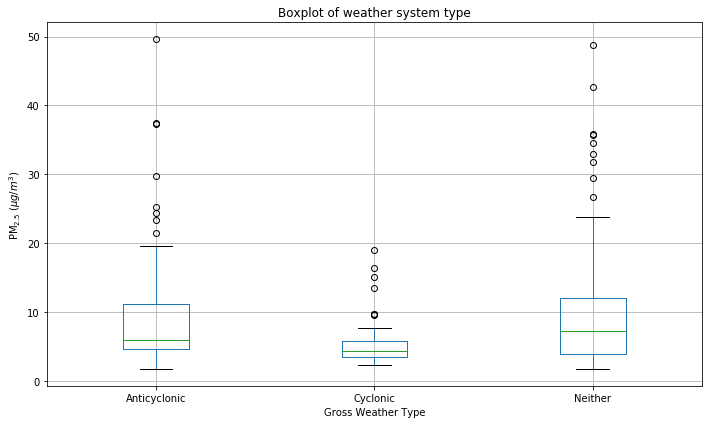

In [78]:
merged.boxplot(by='Gross_LWT', figsize=(10, 6))
#plt.title('Marathon day (5th May 2019) vs other Sundays in April/May')
plt.suptitle('')
plt.title('Boxplot of weather system type')
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.xlabel('Gross Weather Type')
plt.tight_layout()
plt.savefig('graphs/BoxplotGrossLWTs.png', dpi=300)